3. Тренд, сезонность, шум. Инструменты для декомпозиции временного ряда

In [34]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

from statsmodels.tsa.api import SimpleExpSmoothing

In [3]:
df = pd.read_csv("data/AirPassengers.zip", index_col='Month', parse_dates=['Month'])
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


AttributeError: module 'matplotlib' has no attribute 'show'

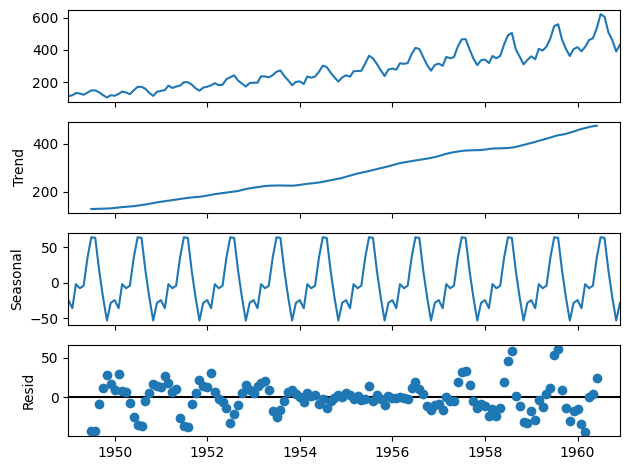

In [4]:
decomposition = seasonal_decompose(df)
fig = decomposition.plot()
plt.show()

In [5]:
def exp_smth(x_t, a, s_t_1):
    return a * x_t + (1 - a) * s_t_1

data = np.array([15, 20, 25, 30, 25, 27])
a = 0.7
s = np.zeros(6)
s[0] = data[0]

for i in range(1, len(data)):
    s[i] = exp_smth(data[i], a, s[i-1])

print(s)

[15.      18.5     23.05    27.915   25.8745  26.66235]


In [6]:
from statsmodels.tsa.api import SimpleExpSmoothing

ses = SimpleExpSmoothing(data)

alpha = 0.7

model = ses.fit(smoothing_level = alpha, optimized = False)

forecast = model.forecast(1)

print(forecast)

[26.66235]


In [7]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv(
	"data/daily-total-female-births.zip", 
    header=0, 
    index_col=0
).squeeze("columns")

result = adfuller(df.values)

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")

for key, value in result[4].items():
	print(f"\t{key}: {value:.3f}")

ADF Statistic: -4.808291253559763
p-value: 5.243412990149865e-05
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [8]:
df_diff_1 = df.diff().dropna()

In [9]:
test1 = adfuller(df_diff_1)
print ('adf: ', test1[0])
print ('p-value: ', test1[1])
print ('Critical values: ', test1[4])
if test1[0]> test1[4]['5%']: 
    print ('ряд нестационарен')
else:
    print ('ряд стационарен')

adf:  -12.625178633871343
p-value:  1.5472400091969784e-23
Critical values:  {'1%': -3.44880082033912, '5%': -2.869670179576637, '10%': -2.5711012838861036}
ряд стационарен


6. Автокорреляция

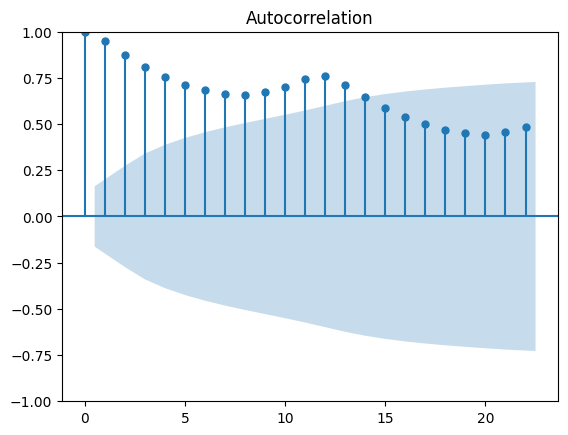

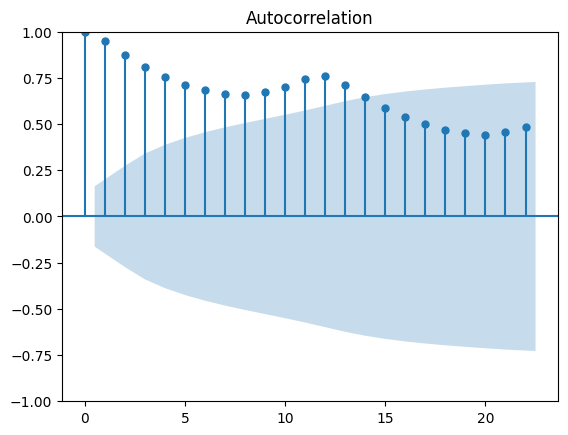

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
df = pd.read_csv("data/AirPassengers.zip", index_col='Month', parse_dates=['Month'])
plot_acf(df)

7. Авторегрессия

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

url='https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv'
df = pd.read_csv(url, sep=",")

In [12]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['Consumption'].values)

if result[0] > result[4]['5%']: 
    print ('Ряд нестационарен')
else:
    print ('Ряд стационарен')

Ряд стационарен


In [13]:
train_data = df['Consumption'][:len(df)-100]
test_data = df['Consumption'][len(df)-100:]

In [14]:
ar_model = AutoReg(train_data, lags=8).fit()
print(ar_model.summary())

                            AutoReg Model Results                             
Dep. Variable:            Consumption   No. Observations:                 4283
Model:                     AutoReg(8)   Log Likelihood              -24231.812
Method:               Conditional MLE   S.D. of innovations             70.058
Date:                Tue, 10 Dec 2024   AIC                          48483.625
Time:                        22:42:20   BIC                          48547.230
Sample:                             8   HQIC                         48506.095
                                 4283                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            121.2792     14.444      8.397      0.000      92.969     149.589
Consumption.L1     0.6393      0.013     47.751      0.000       0.613       0.666
Consumption.L2    -0.0966      0.011

In [15]:
pred = ar_model.predict(start=len(train_data), end=(len(df)-1), dynamic=False)

8. Итоговая практика

In [15]:
df = pd.read_csv('data/tovar_moving.zip', index_col='date', parse_dates=['date'], dayfirst=True)
df.head()

C:\Users\zhigu\AppData\Local\Temp\ipykernel_43940\235607657.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df = pd.read_csv('data/tovar_moving.zip', index_col='date', parse_dates=['date'], dayfirst=True)


,qty
date,
2009-12-25,72314.0
2009-12-26,66586.0
2009-12-27,125199.0
2009-12-28,91544.0
2009-12-29,76995.0


Отложите в test последнее значение временного ряда.

In [16]:
train = df.iloc[:-1]
test = df.iloc[-1]

In [17]:
display(train.iloc[-1])
display(test)

qty    170665.0
Name: 2013-12-01 00:00:00, dtype: float64

qty    423846.0
Name: 2013-12-02 00:00:00, dtype: float64

Проанализируйте временной ряд на наличие тренда и сезонности.

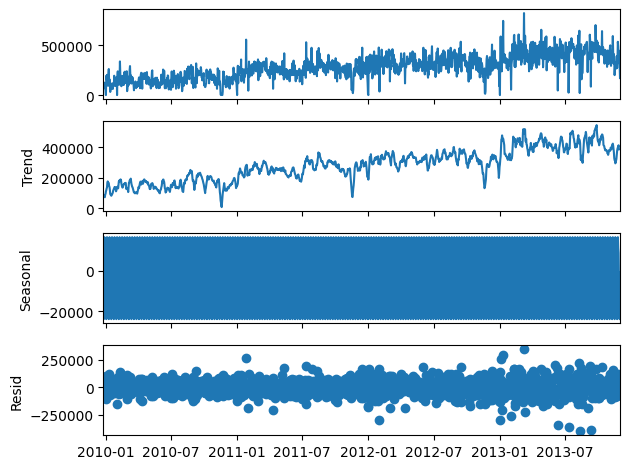

In [20]:
decomposition = seasonal_decompose(train, model='additive') 
decomposition.plot()
plt.pyplot.show() # любуемся результатом

Постройте прогноз на одно последнее значение с помощью экспоненциального сглаживания (=0.7). Сравните результат с фактическим значением, которое вы отложили вначале.

In [22]:
ses = SimpleExpSmoothing(train)
alpha = 0.7
model = ses.fit(smoothing_level = alpha, optimized = False)
exp_pred = model.forecast(1)
exp_pred

c:\DS\lessons\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2013-12-02    225015.522647
Freq: D, dtype: float64

Проверьте ряд на стационарность, определите порядок интегрирования.

In [25]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train)

adf:  -2.255302641033794
p-value:  0.18678903123416657
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
есть единичные корни, ряд не стационарен


In [26]:
otg1diff = train.diff(periods=1).dropna()

In [28]:
stat_test(otg1diff)

adf:  -13.780727380503777
p-value:  9.307227521340049e-26
Critical values:  {'1%': -3.434973278556316, '5%': -2.8635818545830376, '10%': -2.567857072940785}
единичных корней нет, ряд стационарен


Определите порядок модели AR по графику частичной автокорреляции.

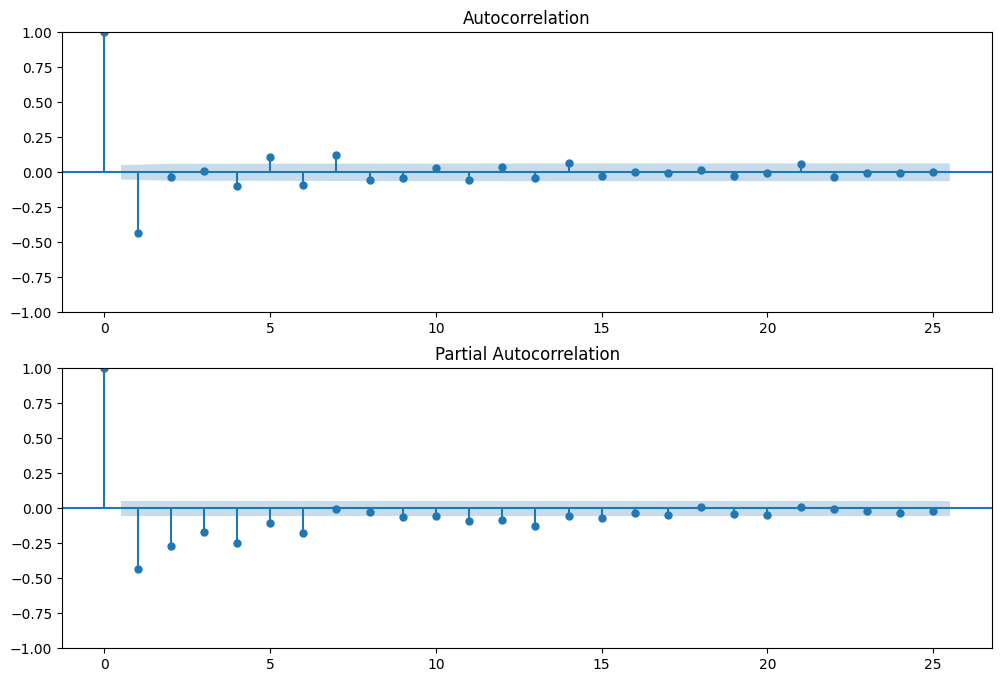

In [47]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(otg1diff.values.squeeze(), lags=25, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(otg1diff, lags=25, ax=ax2)

Постройте модель AR и предскажите последнее значение ряда

In [42]:
p =6

In [49]:
import pandas as pd
import numpy as np
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(train, lags=p).fit()
print(ar_model.summary())

ar_pred = ar_model.predict(start=len(train), end=(len(train)), dynamic=False)
ar_pred

                            AutoReg Model Results                             
Dep. Variable:                    qty   No. Observations:                 1438
Model:                     AutoReg(6)   Log Likelihood              -18221.056
Method:               Conditional MLE   S.D. of innovations          81248.064
Date:                Wed, 11 Dec 2024   AIC                          36458.111
Time:                        17:33:39   BIC                          36500.246
Sample:                    12-31-2009   HQIC                         36473.844
                         - 12-01-2013                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.047e+04   6160.175      4.946      0.000    1.84e+04    4.25e+04
qty.L1         0.3074      0.026     11.654      0.000       0.256       0.359
qty.L2         0.1582      0.027      5.835      0.0

c:\DS\lessons\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\DS\lessons\.venv\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


2013-12-02    318174.284553
Freq: D, dtype: float64